
For Test Data Example No: 1
The indices of its nearest neighbours are
[952 690 320 210 192 836  81 542]
The corresponding labels of the its nearest neighbours are
[[0 5 0 0 0 5 0 0]]

For Test Data Example No: 2
The indices of its nearest neighbours are
[723 753  71  15 911 981 193  79]
The corresponding labels of the its nearest neighbours are
[[7 7 7 7 7 7 7 7]]

For Test Data Example No: 3
The indices of its nearest neighbours are
[484 398 454 638   8 678 112 310]
The corresponding labels of the its nearest neighbours are
[[1 1 1 1 1 1 1 1]]

For Test Data Example No: 4
The indices of its nearest neighbours are
[587 951 593 961 475 637 993 919]
The corresponding labels of the its nearest neighbours are
[[1 1 1 1 1 1 1 1]]

For Test Data Example No: 5
The indices of its nearest neighbours are
[576 604 304  26 718 900 412 354]
The corresponding labels of the its nearest neighbours are
[[4 1 9 4 4 9 4 4]]

The class label of the first example: [5]


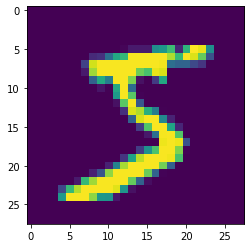

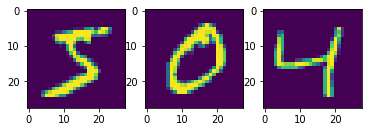

<Figure size 432x288 with 0 Axes>

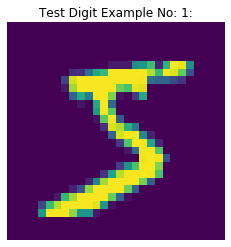

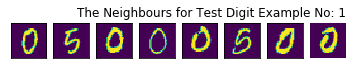

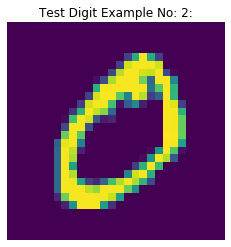

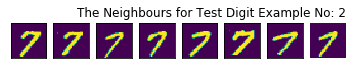

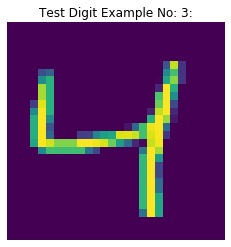

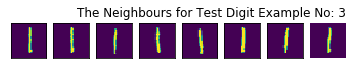

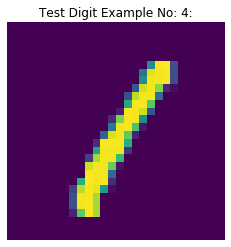

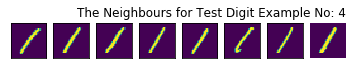

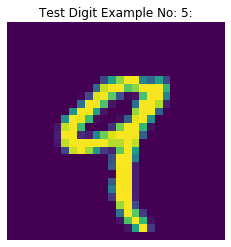

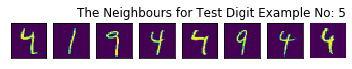

In [1]:
#Q1(a)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
q1_digits = np.load('q1_data/q1_digits.npz')
digits_train = q1_digits['digits_train']
labels_train = q1_digits['labels_train']
digits_test = q1_digits['digits_test']
labels_test = q1_digits['labels_test']
#print(digits_train.shape)

train_data = digits_train.reshape(digits_train.shape[0], -1)
test_data = digits_test.reshape(digits_test.shape[0], -1)

test_data_5 = test_data[0:5, :]
#print(test_data_5)

dist = np.zeros((train_data.shape[0], test_data_5.shape[0]))
#dist = np.zeros((test_data_5.shape[0], train_data.shape[0]))
for i in range(train_data.shape[0]):
    dist[i, :] = np.sqrt(np.sum((test_data_5 - train_data[i])**2, axis = 1))
    #print(np.linalg.norm(test_data_5 - train_data[i], axis=1).shape)
dist2 = np.argsort(dist, axis = 0)
#print(dist2[0:8, :])
#print(labels_train[dist2[0:8,:]].transpose())
for i in range(5):
    print('\nFor Test Data Example No: %i' %(i+1))
    print('The indices of its nearest neighbours are')
    print(dist2[0:8, i])
    print('The corresponding labels of the its nearest neighbours are')
    print(labels_train[dist2[0:8,i]].transpose())
        

# Display an image of a digit
plt.figure()
plt.imshow(digits_train[0,:,:]) # first example in the training dataset
#plt.savefig('digit.png')

# Print the class of the first example
print('\nThe class label of the first example:', labels_train[0])

# Plot multiple images (1 by 3)
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(digits_train[0,:,:])
ax[1].imshow(digits_train[1,:,:])
ax[2].imshow(digits_train[2,:,:])
#plt.savefig('many_digit.png')
plt.figure()
for i in range(5):
    plt.figure()
    plt.title('Test Digit Example No: %i:' %(i+1))
    plt.imshow(digits_train[i,:,:])
    plt.axis('off')
    plt.show()
    fig, axes = plt.subplots(1, 8)
    axes = axes.reshape(8)
    
    indices = dist2[0:8, i]
    for axis, index in zip(axes, indices):
        #plt.figure()
        image = digits_train[index, :, :]
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
        axis.imshow(image)
        plt.axis('off')
    plt.title('The Neighbours for Test Digit Example No: %i' %(i+1), loc = 'right')

In [2]:
#Q1(b)
train_data = digits_train.reshape(digits_train.shape[0], -1)
test_data = digits_test.reshape(digits_test.shape[0], -1)
labels_train = q1_digits['labels_train']
dist = np.zeros((train_data.shape[0], test_data.shape[0]))
for i in range(train_data.shape[0]):
    dist[i, :] = np.sqrt(np.sum((test_data - train_data[i])**2, axis = 1))
    #dist[i, :] = (np.sum((np.abs(test_data - train_data[i]))**11, axis =1))**(1/11) Minkowski Distance
dist2 = np.argsort(dist, axis = 0)
dist3 = dist2[0:10,:]
y = labels_train[dist3]
y = y.reshape(y.shape[0], -1)
y = y.transpose()
#print(y[0][:])
#print(y.shape)
labels_test = labels_test.astype(np.float64)
x = np.zeros((y.shape[0],1))
for i in range(y.shape[0]):
    x[i] = np.bincount(y[i][:]).argmax()
#print(labels_train.shape)
accuracy = sum(a == b for a,b in zip(x, labels_test))
class_acc = (accuracy/x.shape[0])*100
print('The classification accuracy is %g%%' %class_acc)
#labels_train[dist3].transpose()
#print(dist3)

The classification accuracy is 85.7%


In [3]:
#Q1(d)
train_data = digits_train.reshape(digits_train.shape[0], -1)
test_data = digits_test.reshape(digits_test.shape[0], -1)
labels_train = q1_digits['labels_train']
dist = np.zeros((train_data.shape[0], test_data.shape[0]))
dist_ = np.zeros((train_data.shape[0], test_data.shape[0]))

for i in range(train_data.shape[0]):
    dist[i, :] = np.sqrt(np.sum((test_data - train_data[i])**2, axis = 1))
    dist_[i, :] = (np.sum((np.abs(test_data - train_data[i]))**11, axis =1))**(1/11) #Minkowski Distance
dist2 = np.argsort(dist, axis = 0)
dist2_ = np.argsort(dist_, axis = 0)
for j in range(1,20):
    dist3 = dist2[0:j,:]
    dist3_ = dist2_[0:j, :]
    y = labels_train[dist3]
    y = y.reshape(y.shape[0], -1)
    y = y.transpose()
    y_ = labels_train[dist3_]
    y_ = y_.reshape(y_.shape[0], -1)
    y_ = y_.transpose()
    #print(y[0][:])
    #print(y.shape)
    labels_test = labels_test.astype(np.float64)
    x = np.zeros((y.shape[0],1))
    x_ = np.zeros((y_.shape[0], 1))
    for i in range(y.shape[0]):
        x[i] = np.bincount(y[i][:]).argmax()
    for i in range(y_.shape[0]):
        x_[i] = np.bincount(y_[i][:]).argmax()
    #print(labels_train.shape)
    accuracy = sum(a == b for a,b in zip(x, labels_test))
    class_acc = (accuracy/x.shape[0])*100
    print('\nFor Number of Neighbours = %i' %j)
    print('The classification accuracy for Euclidean Distance is %g%%' %class_acc)
    accuracy_ = sum(a == b for a,b in zip(x_, labels_test))
    class_acc_ = (accuracy_/x_.shape[0])*100
    print('The classification accuracy for Minkowski Distance is %g%%' %class_acc_)


For Number of Neighbours = 1
The classification accuracy for Euclidean Distance is 88.3%
The classification accuracy for Minkowski Distance is 89.5%

For Number of Neighbours = 2
The classification accuracy for Euclidean Distance is 85%
The classification accuracy for Minkowski Distance is 87.9%

For Number of Neighbours = 3
The classification accuracy for Euclidean Distance is 86.5%
The classification accuracy for Minkowski Distance is 87.6%

For Number of Neighbours = 4
The classification accuracy for Euclidean Distance is 86.6%
The classification accuracy for Minkowski Distance is 88%

For Number of Neighbours = 5
The classification accuracy for Euclidean Distance is 85.7%
The classification accuracy for Minkowski Distance is 87%

For Number of Neighbours = 6
The classification accuracy for Euclidean Distance is 85.7%
The classification accuracy for Minkowski Distance is 87.3%

For Number of Neighbours = 7
The classification accuracy for Euclidean Distance is 85.3%
The classificati